<a href="https://colab.research.google.com/github/nagendra001-droid/titanicsurvivalbasic/blob/master/basic_with_xavier_initializationandregularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
df=pd.read_csv('/content/titanic.csv')
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [98]:
df = df.drop(['Name','Fare'],axis=1)


In [99]:
df.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [100]:
# df=df.apply(lambda col: pd.factorize(col, sort=False)[0])
print(df.head())

   Survived  Pclass  ... Siblings/Spouses Aboard  Parents/Children Aboard
0         0       3  ...                       1                        0
1         1       1  ...                       1                        0
2         1       3  ...                       0                        0
3         1       1  ...                       1                        0
4         0       3  ...                       0                        0

[5 rows x 6 columns]


In [101]:
dum=pd.get_dummies(df['Sex'])
dum

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
882,0,1
883,1,0
884,1,0
885,0,1


In [102]:
dum=dum.drop(columns=['male'],axis=1)
print(dum)

     female
0         0
1         1
2         1
3         1
4         0
..      ...
882       0
883       1
884       1
885       0
886       0

[887 rows x 1 columns]


In [103]:
df=df.drop(columns=['Sex'])

In [104]:
dum2=pd.get_dummies(df['Pclass'])
dum2=dum2.drop(columns=[3],axis=1)
print(dum2)

     1  2
0    0  0
1    1  0
2    0  0
3    1  0
4    0  0
..  .. ..
882  0  1
883  1  0
884  0  0
885  1  0
886  0  0

[887 rows x 2 columns]


In [105]:
df= df.drop(columns=['Pclass'])
df.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


In [106]:
td=pd.concat([df,dum,dum2],axis=1)

In [107]:
td.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,female,1,2
0,0,22.0,1,0,0,0,0
1,1,38.0,1,0,1,1,0
2,1,26.0,0,0,1,0,0
3,1,35.0,1,0,1,1,0
4,0,35.0,0,0,0,0,0


In [108]:
import numpy as np
X=np.array(td.drop(columns='Survived'))

In [109]:
Y=np.array([td['Survived']])

In [110]:
print(X[0:5])
print(Y[0:5])

[[22.  1.  0.  0.  0.  0.]
 [38.  1.  0.  1.  1.  0.]
 [26.  0.  0.  1.  0.  0.]
 [35.  1.  0.  1.  1.  0.]
 [35.  0.  0.  0.  0.  0.]]
[[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0
  1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0
  0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
  0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1
  0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
  0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
  1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1
  0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0
  0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0
  0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 

In [111]:
X=X.T


In [112]:
print(X)
print(X.shape)

[[22. 38. 26. ...  7. 26. 32.]
 [ 1.  1.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  1.  1. ...  1.  0.  0.]
 [ 0.  1.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(6, 887)


In [138]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
 
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*10
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*10
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [180]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [115]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    cache = (A, W, b)
   
    
    
    return Z, cache

In [116]:
def sigmoid(Z):
  return (1/(1+np.exp(-Z))),Z

In [117]:
def relu(Z):
  return np.maximum(0,Z),Z

In [118]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
   
    cache = (linear_cache, activation_cache)

    return A, cache

In [137]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
           
    return AL, caches

In [ ]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y,parameters,lambd=0.5):
   
    
    m = Y.shape[1]
    sumofw=0
    for i in range(len(parameters)//2):
      sumofw+=np.sum(np.square(parameters["W"+str(i+1)]))

    cost = -1/m*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))+lambd/(2*m)*sumofw
    
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [ ]:
def dzsig(AL,Y):
  dzsigm= 1/m*(AL-Y)
  return dzsigm

In [120]:
def dzrel(dzsigm,W2,A1):
  
  A1[A1>0]=1
  A1[A1<=0]=0
    
      
  dzrelu=1/m*np.dot(dzsigm,W2.T)*A1
  return dzrelu

In [121]:
def linear_backward(dZ, cache,lambd=0.5):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
   
    ### START CODE HERE ### (≈ 3 lines of code)
    dW = 1/m*np.dot(dZ,A_prev.T)+lambd/(2*m)*(W)
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [122]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation,lambd=0.5):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache,lambd=0.5)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache,lambd=0.5)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [123]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches,lambd=0.5):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL =-( Y/AL-(1-Y)/(1-AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid",lambd=0.5)
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu",lambd=0.5)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [124]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [125]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" +str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" +str(l+1)]
    ### END CODE HERE ###
    return parameters

In [186]:
import numpy as np
parameters=initialize_parameters_deep([6,5,1])
print(parameters)

{'W1': array([[ 1.03266513,  0.25201908,  0.05571284, -1.07588801, -0.16015015,
        -0.20482019],
       [-0.04777082, -0.36199901, -0.02529843, -0.27552196, -0.75856017,
         0.51073697],
       [ 0.50882921,  0.98702247,  0.02888694, -0.23364061, -0.31486371,
        -0.89285909],
       [ 0.5671701 , -0.63570169, -0.68418693, -0.11873202,  0.85802815,
         0.1366682 ],
       [-0.59108263, -0.41164682,  0.36098535, -0.09267243, -0.44388787,
        -0.1328083 ]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.47121496,  1.2498022 , -0.78685268, -0.39618084, -0.50834631]]), 'b2': array([[0.]])}


In [187]:
AL,caches=L_model_forward(X,parameters)
print(AL[0][0:10])
print(Y[0][0:10])

[0.03069927 0.00221216 0.02030707 0.00334757 0.00779544 0.02323369
 0.00047823 0.14213516 0.03030793 0.11216698]
[0 1 1 1 0 0 0 0 1 1]


In [188]:
cost=compute_cost(AL,Y,parameters)
print(cost)


1.6490033186583983


In [189]:
grads=L_model_backward(AL,Y,caches)


In [190]:
print(grads)


{'dA1': array([[ 0.01446596, -0.47017255, -0.46164596, ...,  0.11748383,
        -0.46057463,  0.00554278],
       [ 0.03836802, -1.24703743, -1.22442238, ...,  0.31160205,
        -1.22158089,  0.0147011 ],
       [-0.02415581,  0.78511204,  0.77087401, ..., -0.19617897,
         0.76908506, -0.00925555],
       [-0.01216246,  0.39530443,  0.38813557, ..., -0.09877624,
         0.38723483, -0.00466017],
       [-0.01560586,  0.50722177,  0.49802329, ..., -0.12674146,
         0.49686754, -0.00597955]]), 'dW2': array([[-1.04166937e+01, -2.71182937e-05, -5.23736169e+00,
        -5.78892115e+00, -2.65211006e-04]]), 'db2': array([[-0.33899533]]), 'dA0': array([[-0.00425088,  0.13816199,  0.13565642, ..., -0.03452307,
         0.1353416 , -0.00162877],
       [-0.01246493,  0.40513507,  0.39778794, ..., -0.10123266,
         0.3968648 , -0.00477607],
       [ 0.00842955, -0.27397729, -0.2690087 , ...,  0.06845976,
        -0.26838442,  0.00322987],
       [-0.0084759 ,  0.27548366,  0.2704

In [191]:
parameters=update_parameters(parameters,grads,learning_rate=0.001)



In [192]:
AL,caches=L_model_forward(X,parameters)
print(AL)

[[5.45106400e-02 6.11088434e-03 3.96820587e-02 8.51679907e-03
  1.98291553e-02 4.70272257e-02 2.05741825e-03 1.50821180e-01
  5.98137110e-02 1.53863944e-01 2.96415229e-01 9.87771757e-04
  9.72105639e-02 3.25863447e-02 1.36014512e-01 2.80686308e-03
  8.48550909e-02 1.17424223e-01 1.55893563e-02 6.06249494e-02
  3.37441265e-02 3.75735224e-02 1.23439061e-01 3.60485738e-02
  1.07760769e-01 2.74317680e-02 5.22824685e-02 4.99584557e-02
  4.91052805e-02 7.15577960e-02 9.72055483e-03 2.01283440e-03
  9.15669043e-02 1.10146321e-03 2.44125635e-02 5.22822639e-03
  1.18607693e-01 8.78579687e-02 4.31820634e-02 9.53009408e-02
  5.77380810e-03 4.09478344e-02 4.87106696e-01 8.27075400e-02
  3.41168210e-02 6.72087339e-02 3.56457255e-02 7.00260293e-02
  6.31849563e-02 1.07632556e-01 8.78579687e-02 1.80090977e-03
  3.30356284e-02 7.93029126e-04 5.00385669e-03 1.10751003e-01
  4.00767876e-02 4.60470938e-01 6.34894599e-02 7.93261192e-02
  9.10499100e-03 3.74779059e-03 1.81371025e-01 6.75834540e-04
  2.8703

1.6490033186583983


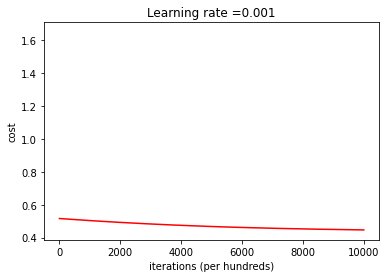

In [195]:
costs=[]
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10000):
  grads=L_model_backward(AL,Y,caches,lambd=0.0)
  parameters=update_parameters(parameters,grads,learning_rate=0.001)

  AL,caches=L_model_forward(X,parameters)
  costs.append(compute_cost(AL,Y,parameters,lambd=0.0))
  plt.plot(np.squeeze(cost))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(0.001))
plt.plot(list(range(10000)), costs, '-r')
print(cost)

In [196]:
print(costs[9999])

0.44639151488618556


In [197]:
print(costs[0
            ])
print(AL[0][0:5])
print(Y[0][0:5])

0.5157765060154009
[0.13083765 0.82513763 0.64810454 0.84326875 0.11467289]
[0 1 1 1 0]


In [ ]:
#

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less_equal


1.6490033186583983


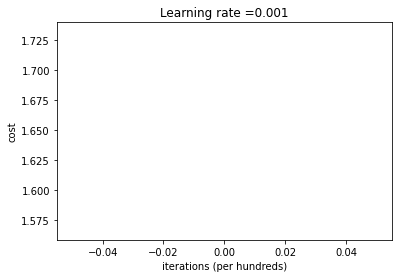

In [185]:
costs=[]
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10000):
  grads=L_model_backward(AL,Y,caches)
  parameters=update_parameters(parameters,grads,learning_rate=0.01)
  AL,caches=L_model_forward(X,parameters)
  costs.append(compute_cost(AL,Y,parameters))
  plt.plot(np.squeeze(cost))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(0.001))
plt.plot(list(range(10000)), costs, '-r')
print(cost)

In [ ]:
print(AL[0][0:10])
print(Y[0][0:10])

In [245]:
AL,caches=L_model_forward([[22],[1],[1],[0],[0],[1]],parameters)
print(AL)

[[0.28976212]]


In [203]:
print(AL)

[[0.32972394]]


In [204]:
td.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,female,1,2
0,0,22.0,1,0,0,0,0
1,1,38.0,1,0,1,1,0
2,1,26.0,0,0,1,0,0
3,1,35.0,1,0,1,1,0
4,0,35.0,0,0,0,0,0
